# Capstone I

**Overview**: The dataset for this project has come from https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients. It is a classification problem for default credit card customers.  



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('data/default of credit card clients.csv', sep = ',', header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

# Understanding Features:

| Column   Position 	| Atrribute Name                	| Definition                                                                                                                            	| Data Type    	| Example              	| % Null Ratios 	|
|:-----------------:|:------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------|:------------:|:--------------------:|:-------------:|
| 1                 	| X1: LIMIT_BAL                 	| Amount of the   given credit (NT dollar): it includes both the individual consumer credit and   his/her family (supplementary) credit 	| Quantitative 	| 50000, 320000, 40000 	| 0             	|
| 2                 	| X2: SEX                       	| Gender (1 =   male; 2 = female)                                                                                                       	| Quantitative 	| 1, 2                 	| 0             	|
| 3                 	| X3: EDUCATION                 	| Education (1 =   graduate school; 2 = university; 3 = high school; 4 = others)                                                        	| Quantitative 	| 1, 2, 3              	| 0             	|
| 4                 	| X4: MARRIAGE                  	| Marital status   (1 = married; 2 = single; 3 = others)                                                                                	| Quantitative 	| 1, 2, 3              	| 0             	|
| 5                 	| X5: AGE                       	| Age (year)                                                                                                                            	| Quantitative 	| 37, 29, 43           	| 0             	|
| 6                 	| X6: PAY_0                     	| History of   past payment. The repayment status in September, 2005*                                                                   	| Quantitative 	| 0, 1, -1             	| 0             	|
| 7                 	| X7: PAY_2                     	| History of past payment. The repayment status in August, 2005*                                                                        	| Quantitative 	| 0, 2, -2             	| 0             	|
| 8                 	| X8: PAY_3                     	| History of past payment. The repayment status in July, 2005*                                                                          	| Quantitative 	| 0, -2, -1            	| 0             	|
| 9                 	| X9: PAY_4                     	| History of past payment. The repayment status in June, 2005*                                                                          	| Quantitative 	| 0, 2, 1              	| 0             	|
| 10                	| X10: PAY_5                    	| History of past payment. The repayment status in May, 2005*                                                                           	| Quantitative 	| 1, -2, 1             	| 0             	|
| 11                	| X11: PAY_6                    	| History of past payment. The repayment status in April, 2005*                                                                         	| Quantitative 	| 0, 1, -1             	| 0             	|
| 12                	| X12: BILL_AMT1                	| Amount of bill   statement in September, 2005 (NT dollar)                                                                             	| Quantitative 	| 46990, 58267, 38257  	| 0             	|
| 13                	| X13: BILL_AMT2                	| Amount of bill   statement in August, 2005 (NT dollar)                                                                                	| Quantitative 	| 48233, 59246, 38901  	| 0             	|
| 14                	| X14: BILL_AMT3                	| Amount of bill   statement in July, 2005 (NT dollar)                                                                                  	| Quantitative 	| 49291, 60184, 38103  	| 0             	|
| 15                	| X15: BILL_AMT4                	| Amount of bill   statement in June, 2005 (NT dollar)                                                                                  	| Quantitative 	| 28314, 58622, 36207  	| 0             	|
| 16                	| X16: BILL_AMT5                	| Amount of bill   statement in May, 2005 (NT dollar)                                                                                   	| Quantitative 	| 28959, 62307, 33138  	| 0             	|
| 17                	| X17: BILL_AMT6                	| Amount of bill   statement in April, 2005 (NT dollar)                                                                                 	| Quantitative 	| 29547, 63526, 31339  	| 0             	|
| 18                	| X18: PAY_AMT1                 	| Amount of   previous payment. Paid in September, 2005 (NT dollar)                                                                     	| Quantitative 	| 2000, 2500, 1700     	| 0             	|
| 19                	| X19: PAY_AMT2                 	| Amount of   previous payment. Paid in August, 2005 (NT dollar)                                                                        	| Quantitative 	| 2019, 2500, 1504     	| 0             	|
| 20                	| X20: PAY_AMT3                 	| Amount of   previous payment. Paid in July, 2005 (NT dollar)                                                                          	| Quantitative 	| 1200, 0, 1200        	| 0             	|
| 21                	| X21: PAY_AMT4                 	| Amount of   previous payment. Paid in June, 2005 (NT dollar)                                                                          	| Quantitative 	| 1100, 4800, 1500     	| 0             	|
| 22                	| X22: PAY_AMT5                 	| Amount of   previous payment. Paid in May, 2005 (NT dollar)                                                                           	| Quantitative 	| 1069, 2400, 1500     	| 0             	|
| 23                	| X23: PAY_AMT6                 	| Amount of   previous payment. Paid in April, 2005 (NT dollar)                                                                         	| Quantitative 	| 1000, 1600, 1000     	| 0             	|
| 24                	| Y: Default Payment Next Month 	| Probability of Default. (1: Yes, 0: No)                                                                                               	| Quantitative 	| 1, 0                 	| 0             	|---

*The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

### Acknowledgement

This data set has been sourced from the Machine Learning Repository of University of California, Irvine [Default of Credit Card Clients Data Set (UC Irvine)](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 
The UCI page mentions the following publication as the original source of the data set:

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480*


# Exploratory Data Analysis

## Check Missing Values

In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Check for Duplicates

In [7]:
df.duplicated().sum()

0

## Cleaning the Data


In [8]:
print(df['MARRIAGE'].min(), df['MARRIAGE'].max()) 
# we need to add 0s to 3s since marriage column does not suppose to have zeros

0 3


In [9]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3});

In [10]:
print(df['EDUCATION'].min(), df['EDUCATION'].max()) 
# same goes for education, we don't have 0 or 5 or 6, we add them as 4 as for "other"

0 6


In [11]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5:4, 6:4});

In [12]:
print(df['SEX'].min(), df['SEX'].max()) # gender is the correct range, we have 1 and 2

1 2


In [13]:
print(df['default payment next month'].min(), df['default payment next month'].max()) 
# the predict variable is correct range. 

0 1


In [14]:
print(df['LIMIT_BAL'].min(), df['LIMIT_BAL'].max()) 
# balance is in the right range, but right skewed

10000 1000000


In [15]:
print(df['AGE'].min(), df['AGE'].max()) 
# Age is right skewed

21 79


In [16]:
print(df['BILL_AMT6'].min(), df['BILL_AMT6'].max()) 


-339603 961664


In [17]:
print(df['PAY_AMT3'].min(), df['PAY_AMT3'].max()) 


0 896040


In [18]:
df[df['BILL_AMT6']<0][['default payment next month']].count()

default payment next month    688
dtype: int64

In [19]:
df = df[df['BILL_AMT1']>0]
df = df[df['BILL_AMT2']>0]
df = df[df['BILL_AMT3']>0]
df = df[df['BILL_AMT4']>0]
df = df[df['BILL_AMT5']>0]
df = df[df['BILL_AMT6']>0]

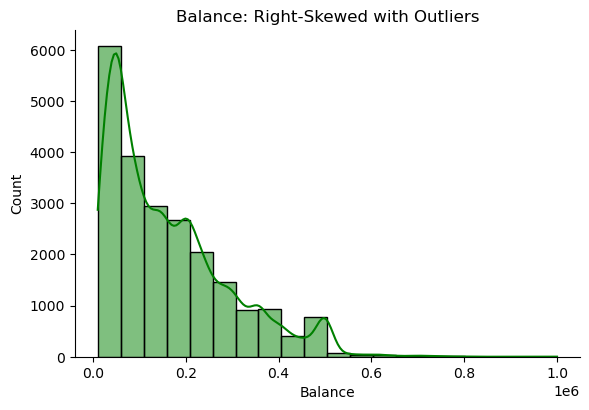

In [20]:
sns.displot(df['LIMIT_BAL'], bins=20, color='green', kde=True, height=4, aspect=1.5)
plt.xlabel("Balance")
plt.title("Balance: Right-Skewed with Outliers")

#removing outliers
df = df[df['LIMIT_BAL']<600000]

## Check Dataset Shape and Variance

In [21]:
df.shape

(22299, 25)

In [22]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000,...,22299.000000,22299.000000,22299.000000,22299.000000,2.229900e+04,22299.000000,22299.000000,22299.000000,22299.000000,22299.000000
mean,15093.866855,159541.669133,1.596081,1.871923,1.562357,35.348625,0.107225,0.142024,0.125297,0.093681,...,54954.189156,51388.894076,49861.301942,6362.149872,6.449970e+03,5718.650522,5263.607247,5338.833401,5589.137091,0.226871
std,8616.528841,126706.789366,0.490693,0.728758,0.521321,9.272844,1.071249,1.103066,1.085788,1.056764,...,67644.206883,63721.324031,62252.483843,17156.822985,2.077870e+04,16638.680971,14736.344158,14766.731193,17119.305811,0.418818
min,2.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,2.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7662.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,11442.000000,10278.000000,9699.500000,1500.000000,1.465000e+03,1019.000000,900.000000,975.000000,799.000000,0.000000
50%,15224.000000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,29291.000000,27952.000000,27179.000000,2916.000000,2.700000e+03,2169.000000,2000.000000,2000.000000,2000.000000,0.000000
75%,22446.000000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,73067.500000,68200.000000,66309.500000,5932.000000,5.648000e+03,5000.000000,5000.000000,5000.000000,5000.000000,0.000000
max,30000.000000,590000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000,1.000000


In [23]:
df = df.drop('ID', axis=1)

## Change Categorical Data to Appropriate Object Type

In [24]:
df['SEX'] = df['SEX'].astype('object')
df['EDUCATION'] = df['EDUCATION'].astype('object')
df['MARRIAGE'] = df['MARRIAGE'].astype('object')

## Check the Scaling

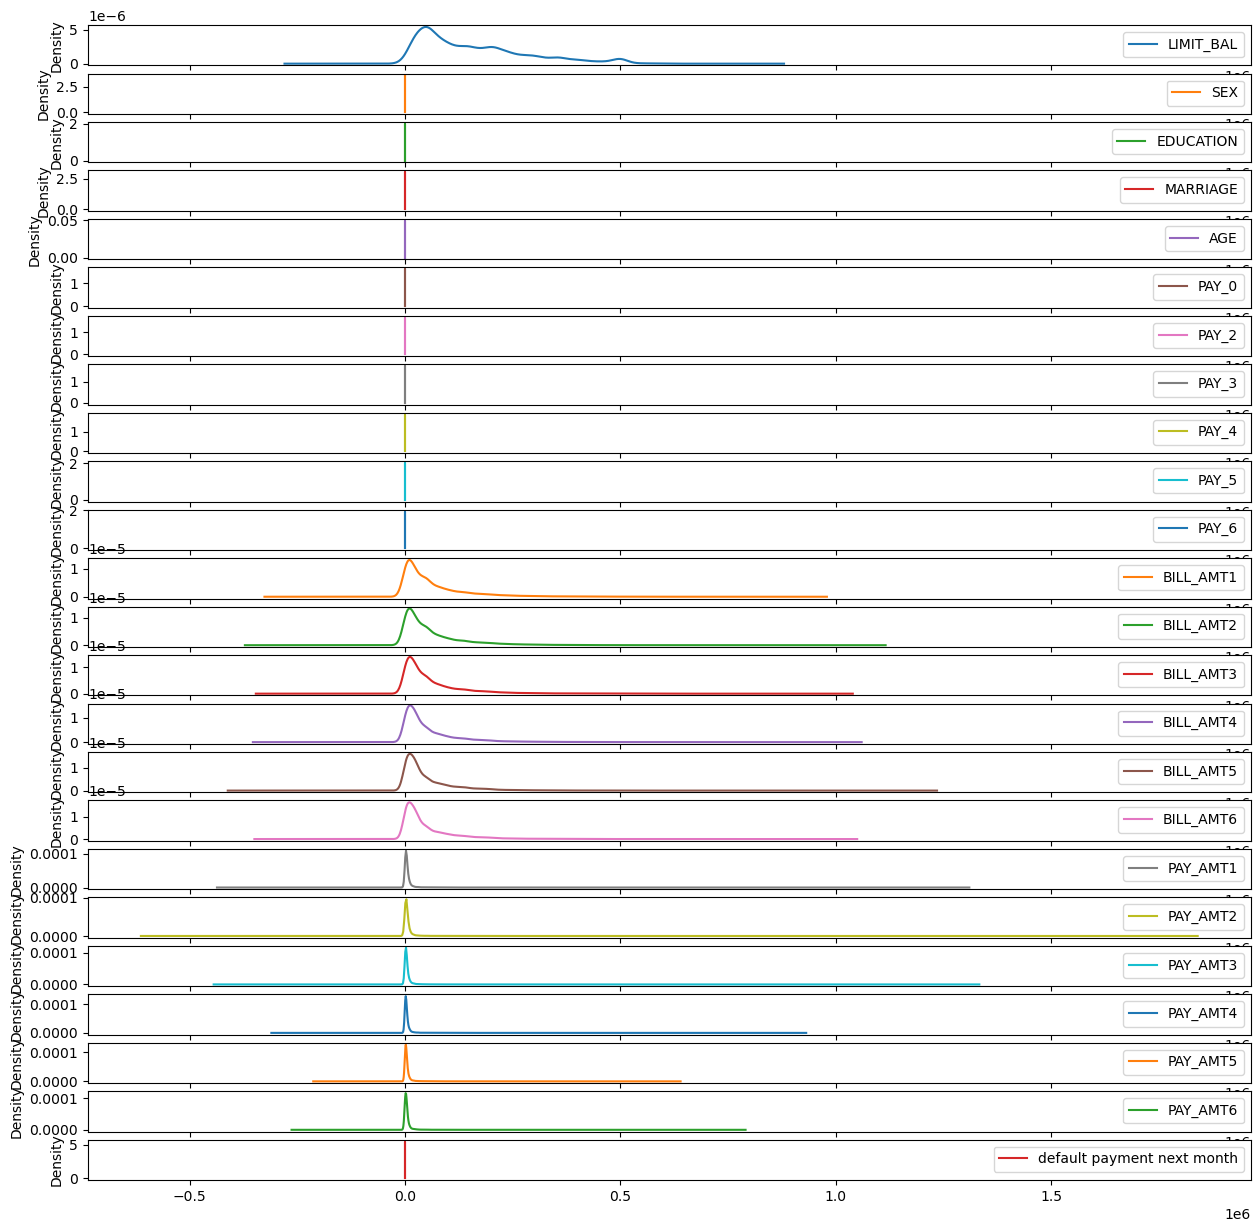

In [25]:
df.plot( kind = 'kde', figsize=(15,15), subplots=True);

In [26]:
df.groupby('default payment next month').describe().T

default payment next month              0              1
LIMIT_BAL count              17240.000000    5059.000000
          mean              172489.095128  115419.584898
          std               129546.774270  105161.188050
          min                10000.000000   10000.000000
          25%                60000.000000   40000.000000
...                                   ...            ...
PAY_AMT6  min                    0.000000       0.000000
          25%                 1000.000000     390.000000
          50%                 2110.000000    1409.000000
          75%                 5000.000000    3181.500000
          max               527143.000000  287982.000000

[160 rows x 2 columns]

## Check for Imblanace Data

default payment next month
0    0.773129
1    0.226871
Name: proportion, dtype: float64

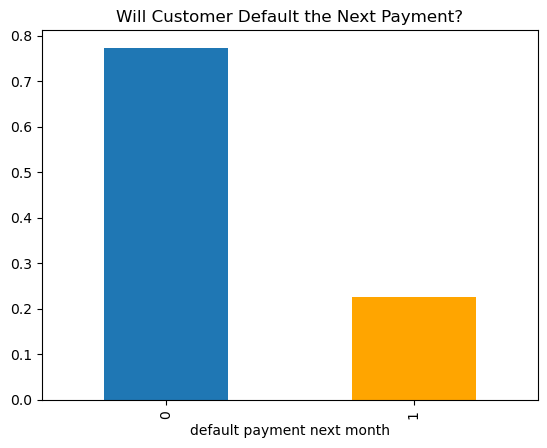

In [27]:
df['default payment next month'].value_counts(normalize=True).plot(kind='bar', title='Will Customer Default the Next Payment?', 
                                                                   color=["#1f77b4","orange"])
df['default payment next month'].value_counts(normalize=True) 
#dummy classifier is good 78% only, we had to beat 77.88% for any algorithm we use

## Check for Correlations

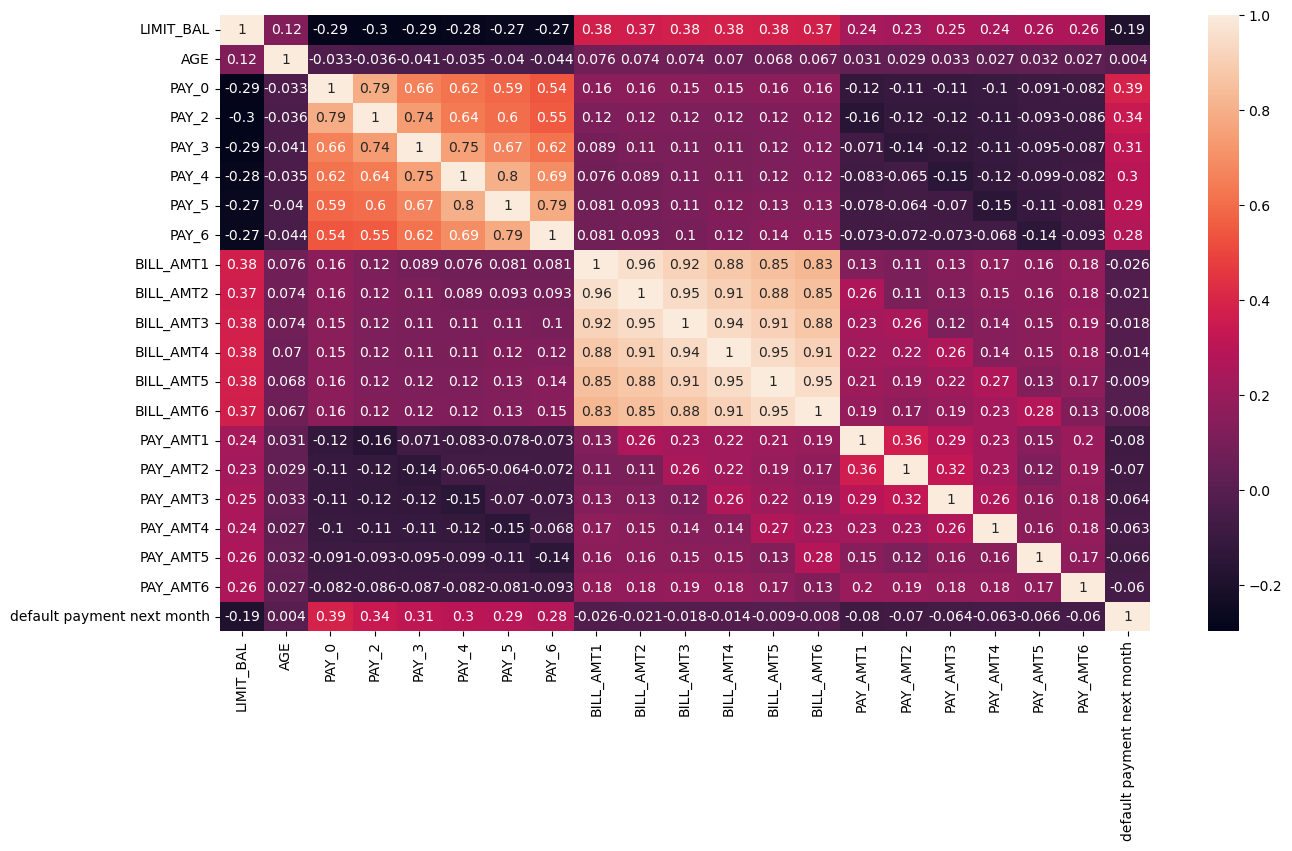

In [28]:
#bi-variate analysis
corr = df.corr(numeric_only = True).round(3)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True);

## Engineering Features

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22299 entries, 1 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   22299 non-null  int64 
 1   SEX                         22299 non-null  object
 2   EDUCATION                   22299 non-null  object
 3   MARRIAGE                    22299 non-null  object
 4   AGE                         22299 non-null  int64 
 5   PAY_0                       22299 non-null  int64 
 6   PAY_2                       22299 non-null  int64 
 7   PAY_3                       22299 non-null  int64 
 8   PAY_4                       22299 non-null  int64 
 9   PAY_5                       22299 non-null  int64 
 10  PAY_6                       22299 non-null  int64 
 11  BILL_AMT1                   22299 non-null  int64 
 12  BILL_AMT2                   22299 non-null  int64 
 13  BILL_AMT3                   22299 non-null  int64 


In [30]:
# sklearn OneHotEncoder, pandas: get_dummies

df2 = pd.get_dummies(df, drop_first=True)

In [31]:
df2.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

# Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df2.drop(columns = 'default payment next month')
y = df2['default payment next month']

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [35]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

display(X_train.head())
display(y_train.head())


X_train: (15609, 26)
y_train: (15609,)


X_test: (6690, 26)
y_test: (6690,)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
10357,190000,48,0,0,0,0,0,0,146034,142003,...,2800,2366,2066,96264,True,False,False,True,False,False
14691,20000,28,2,2,2,2,2,2,12762,12272,...,0,1200,0,1500,False,True,False,False,True,False
20058,80000,37,-1,-1,-1,-1,-1,-1,2028,286,...,10071,317,728,16312,True,False,False,False,False,False
17009,400000,30,0,0,0,0,0,0,153655,156309,...,85450,10140,88097,10086,True,False,False,False,True,False
20952,10000,37,0,0,0,0,0,0,4950,5963,...,1133,291,302,1000,False,False,True,False,True,False


10357    0
14691    1
20058    0
17009    0
20952    1
Name: default payment next month, dtype: int64

In [36]:
X_train.select_dtypes(['int', 'float']).head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
10357,190000,48,0,0,0,0,0,0,146034,142003,135885,102718,68604,45976,5704,4305,2800,2366,2066,96264
14691,20000,28,2,2,2,2,2,2,12762,12272,14255,13729,14706,14320,0,2500,0,1200,0,1500
20058,80000,37,-1,-1,-1,-1,-1,-1,2028,286,14255,10056,317,728,286,14255,10071,317,728,16312
17009,400000,30,0,0,0,0,0,0,153655,156309,137701,191514,121092,166173,26876,10134,85450,10140,88097,10086
20952,10000,37,0,0,0,0,0,0,4950,5963,6983,7993,8151,8322,1103,1123,1133,291,302,1000


## Scaling Columns

In [37]:
to_be_scaled_columns = X.columns

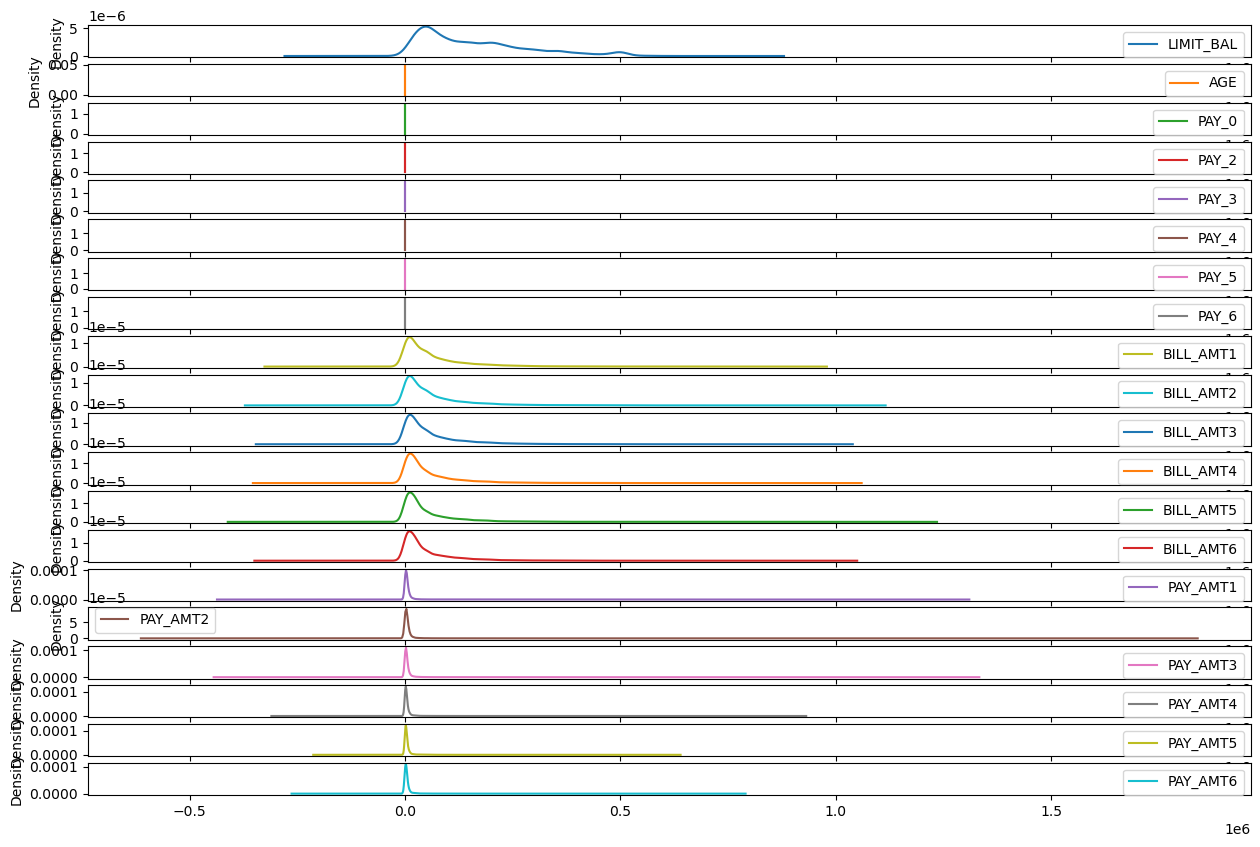

In [38]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])


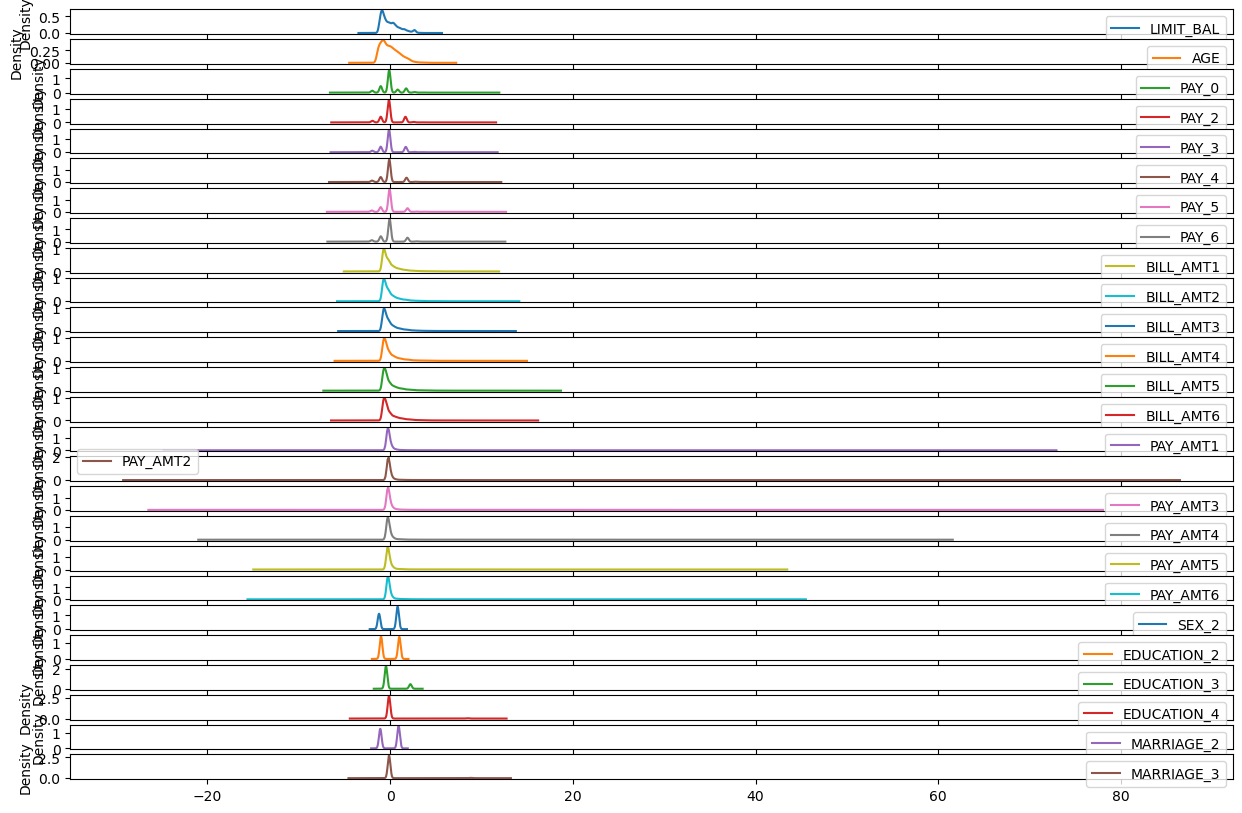

In [40]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [41]:
# check to see if scaler worked:
X_train[to_be_scaled_columns].agg(['mean', 'std']).round(1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Dummuy Classifier Performance

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
dummy = DummyClassifier()

In [44]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [45]:
print('The accuracy of the model for Train is {:.2f}'.format(dummy.score(X_train, y_train)))

The accuracy of the model for Train is 0.77


In [46]:
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Test is 0.78


# Create the Result Table

In [47]:
result_df = pd.DataFrame({ 
                          'Train Time (ms)':[], 
                          'Train Accuracy':[], 
                          'Test Accuracy':[],
                          'Test Recall':[],
                          'Test Precision':[]}, index=[])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

def plot_confusion_matrix(model, X, y, title):
    #generate cm:
    cm = confusion_matrix(y, model.predict(X), labels = model.classes_)

    #display
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

    #show plot
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()

def print_all_scores(name, ttime, y, pred, train_acc):
    acc = accuracy_score(y, pred)
    rec = recall_score(y, pred)
    prec = precision_score(y, pred)
    print ('Accuracy of {}: '.format(name), acc)
    print ('Recall of {}: '.format(name), rec)
    print ('Precision of {}: '.format(name), prec)
    return pd.DataFrame([{'Train Time (ms)':round(ttime * 1000, 2), 
                             'Train Accuracy':train_acc, 
                             'Test Accuracy': acc,
                             'Test Recall': rec,
                             'Test Precision': prec,
                            }], index=[name])



# A Simple Model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression(random_state=42)

start = time.time()
lr.fit(X_train, y_train)
end_time = time.time() - start


In [50]:
accuracy_train = lr.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.82


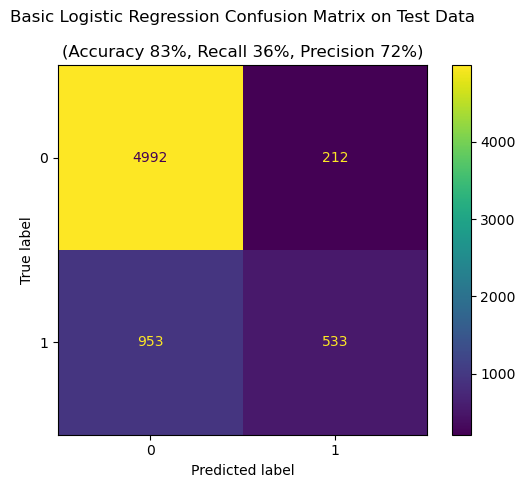

In [51]:
plot_confusion_matrix(lr, X_test, y_test, 
                      'Basic Logistic Regression Confusion Matrix on Test Data\n\n(Accuracy 83%, Recall 36%, Precision 72%)')

In [52]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Logistic Regression', end_time, y_test, lr.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Logistic Regression:  0.8258594917787743
Recall of Basic Logistic Regression:  0.35868102288021536
Precision of Basic Logistic Regression:  0.7154362416107383


In [53]:
from sklearn.metrics import classification_report

In [54]:
y_pred = lr.predict(X_test)
target_names = ['no', 'yes']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

          no       0.84      0.96      0.90      5204
         yes       0.72      0.36      0.48      1486

    accuracy                           0.83      6690
   macro avg       0.78      0.66      0.69      6690
weighted avg       0.81      0.83      0.80      6690



# EDA Conclusion:

1- Data is highly imbalanced. We need to use appropriate measures like F1 or Recall instead of Accuracy. 

2- Imbalance data needs to be undersampled or oversampled so models like LogisticRegression do not eliminate the small class. SVC needs to have balance parameter.

3- There are correlations between features. PAY_0 has increasing correlation gradually up tp PAY_6, as well as BILL_AMT1 up to BILL_AMT6.


# Linear Correlations

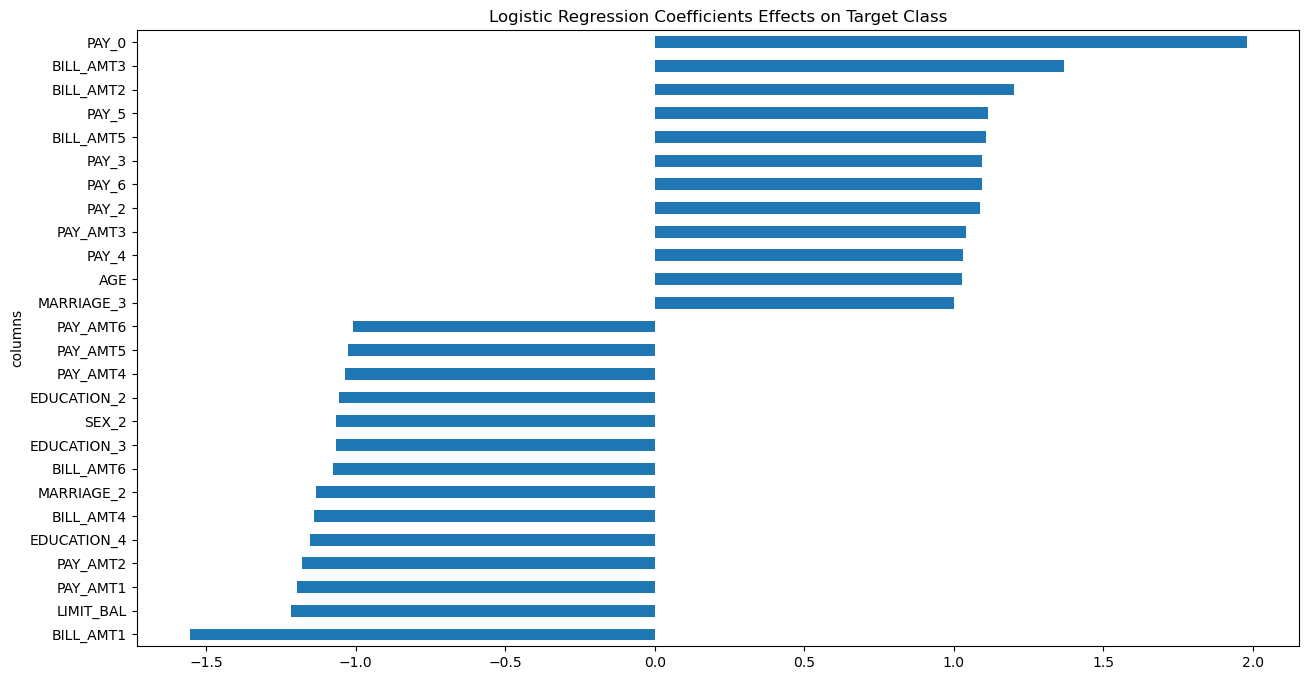

In [55]:
coefs = np.exp(lr.coef_[0]) #convert logistic regression Logarithmic coefs to normal values
for index in range(len(coefs)):
    if coefs[index]<1.0:
        coefs[index] = - 1.0 / coefs[index]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs, 'absolute':abs(coefs)}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False, figsize=(15,8))
plt.title('Logistic Regression Coefficients Effects on Target Class')

plt.show()

In [56]:
lr_results.sort_values(by='absolute', ascending=False) 


,columns,values,absolute
2,PAY_0,1.979392,1.979392
8,BILL_AMT1,-1.555101,1.555101
10,BILL_AMT3,1.368469,1.368469
0,LIMIT_BAL,-1.216240,1.216240
9,BILL_AMT2,1.202674,1.202674
14,PAY_AMT1,-1.194784,1.194784
15,PAY_AMT2,-1.178349,1.178349
23,EDUCATION_4,-1.151867,1.151867
11,BILL_AMT4,-1.140484,1.140484
24,MARRIAGE_2,-1.133663,1.133663


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train, y_train)
end_time = time.time() - start

In [59]:
accuracy_train = knn.score(X_train, y_train)
print('The accuracy of the KNN model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the KNN model for Train is 0.85


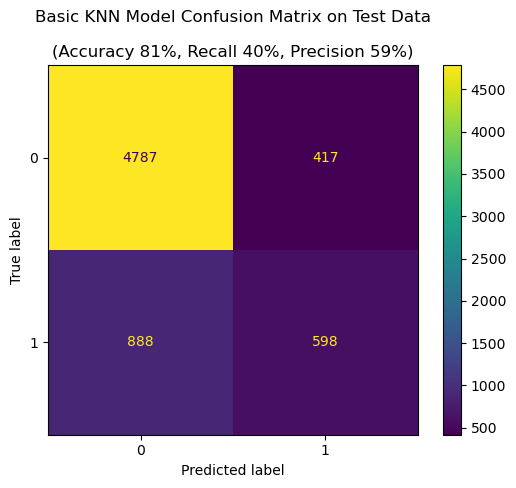

In [60]:
plot_confusion_matrix(knn, X_test, y_test, 
                      'Basic KNN Model Confusion Matrix on Test Data\n\n(Accuracy 81%, Recall 40%, Precision 59%)')

In [61]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic KNN', end_time, y_test, knn.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic KNN:  0.804932735426009
Recall of Basic KNN:  0.40242261103633914
Precision of Basic KNN:  0.5891625615763547


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier(random_state=42)


start = time.time()
dt.fit(X_train, y_train)
end_time = time.time() - start

In [64]:
accuracy_train = dt.score(X_train, y_train)
print('The accuracy of the DT model for Train is {:.2f}'.format(accuracy_train))


The accuracy of the DT model for Train is 1.00


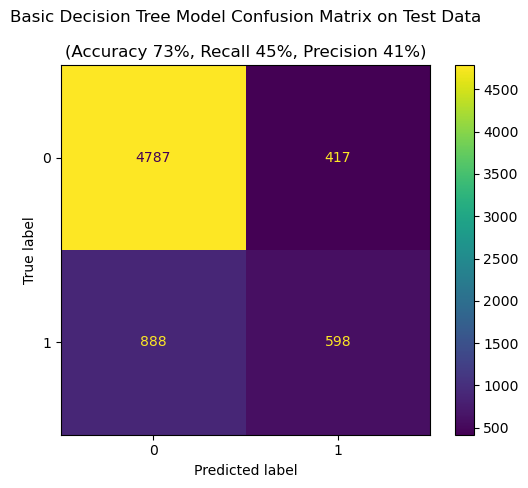

In [65]:
plot_confusion_matrix(knn, X_test, y_test, 
                      'Basic Decision Tree Model Confusion Matrix on Test Data\n\n(Accuracy 73%, Recall 45%, Precision 41%)')

In [66]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Decision Tree', end_time, y_test, dt.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Decision Tree:  0.7333333333333333
Recall of Basic Decision Tree:  0.4475100942126514
Precision of Basic Decision Tree:  0.4084766584766585


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(random_state=42)


start = time.time()
rf.fit(X_train, y_train)
end_time = time.time() - start

In [69]:
accuracy_train = rf.score(X_train, y_train)
print('The accuracy of the RF model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the RF model for Train is 1.00


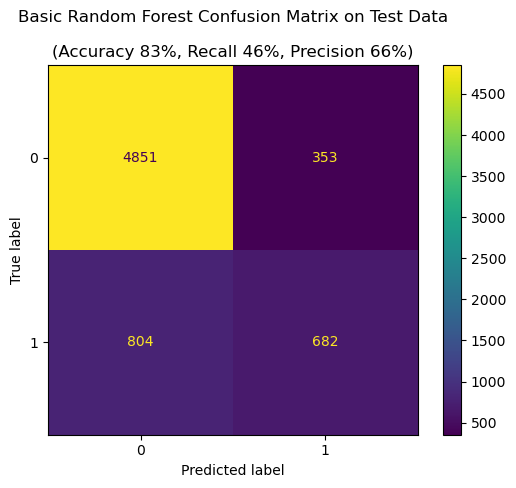

In [70]:
plot_confusion_matrix(rf, X_test, y_test, 
                      'Basic Random Forest Confusion Matrix on Test Data\n\n(Accuracy 83%, Recall 46%, Precision 66%)')

In [71]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic Random Forest', end_time, y_test, rf.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic Random Forest:  0.8270553064275037
Recall of Basic Random Forest:  0.458950201884253
Precision of Basic Random Forest:  0.6589371980676328


# Non-linear Correlations

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_36368\1336615215.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


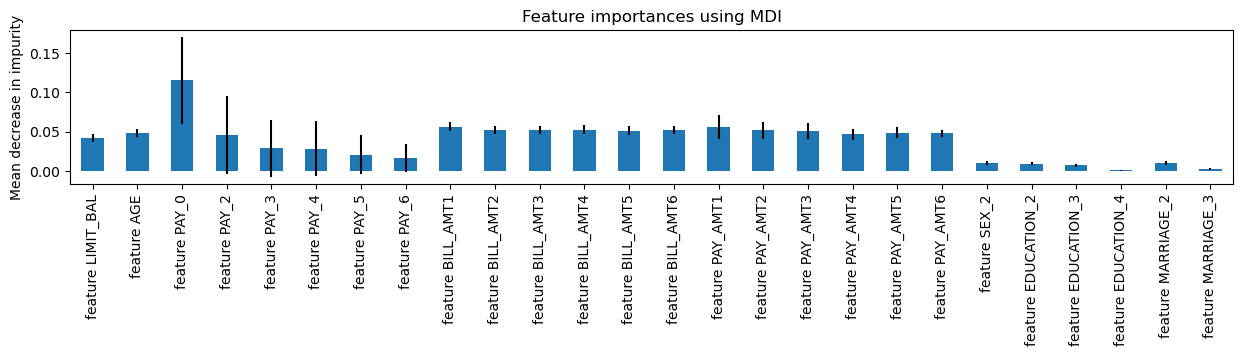

In [72]:
import numpy as np

feature_names = [f"feature {i}" for i in X.columns.tolist()]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(15,2))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [73]:
from sklearn.svm import SVC

In [74]:
svc = SVC(random_state=42)

start = time.time()
svc.fit(X_train, y_train)
end_time = time.time() - start

In [75]:
accuracy_svc_train = svc.score(X_train, y_train)
print('The accuracy of the SVC model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the SVC model for Train is 1.00


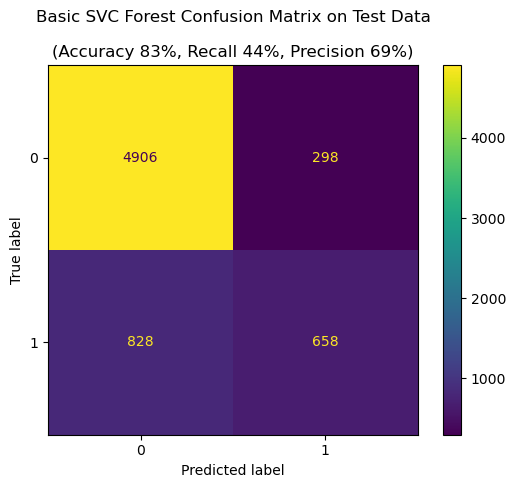

In [76]:
plot_confusion_matrix(svc, X_test, y_test, 
                      'Basic SVC Forest Confusion Matrix on Test Data\n\n(Accuracy 83%, Recall 44%, Precision 69%)')

In [77]:
result_df = pd.concat([result_df, 
                       print_all_scores('Basic SVC', end_time, y_test, svc.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Basic SVC:  0.8316890881913304
Recall of Basic SVC:  0.4427994616419919
Precision of Basic SVC:  0.6882845188284519


In [78]:
#print(result_df.to_string(index=False))
result_df

,Train Time (ms),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Basic Logistic Regression,39.15,0.815875,0.825859,0.358681,0.715436
Basic KNN,5.00,0.845153,0.804933,0.402423,0.589163
Basic Decision Tree,268.66,0.999936,0.733333,0.447510,0.408477
Basic Random Forest,3258.18,0.999808,0.827055,0.458950,0.658937
Basic SVC,3606.24,0.999808,0.831689,0.442799,0.688285


# Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [79]:
df2.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [80]:
df3 = pd.get_dummies(df2.drop([  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6',  'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6',  'PAY_AMT2','PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3',  'MARRIAGE_2',
       'MARRIAGE_3'], axis=1), drop_first=True)

In [81]:
X = df3.drop(columns = 'default payment next month')
y = df3['default payment next month']

In [82]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [83]:
to_be_scaled_columns = ['LIMIT_BAL', 'PAY_0','AGE', 'BILL_AMT1','BILL_AMT2','PAY_AMT1','BILL_AMT2','EDUCATION_4']

In [84]:
X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])

In [85]:
dummy.fit(X_train, y_train)

print('The accuracy of the model for Train is {:.2f}'.format(dummy.score(X_train, y_train)))
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Train is 0.77
The accuracy of the model for Test is 0.78


In [86]:
lr = LogisticRegression(class_weight='balanced', penalty='l2', fit_intercept=False, random_state=42)
start = time.time()
lr.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = lr.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.62


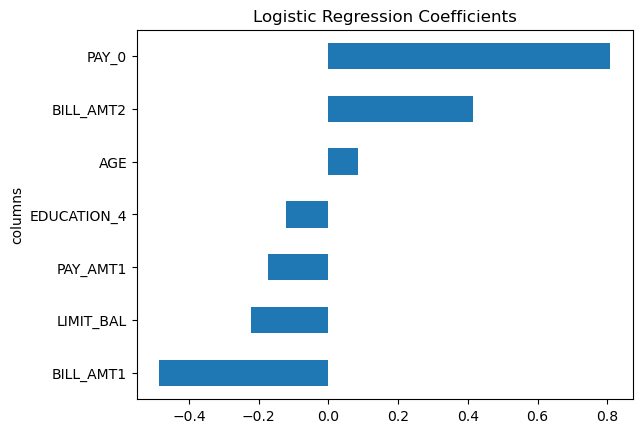

In [87]:
coefs = lr.coef_[0]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False)
plt.title('Logistic Regression Coefficients')

plt.show()

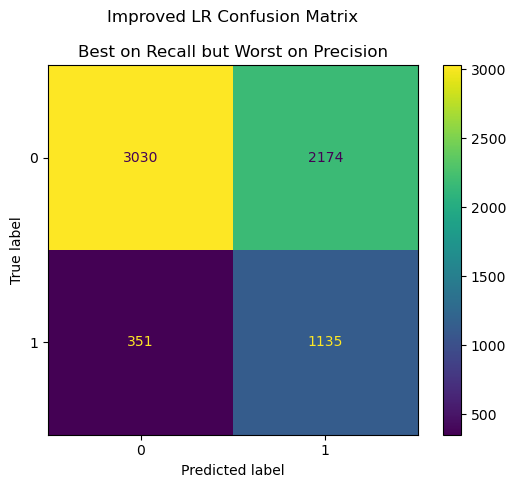

In [88]:
plot_confusion_matrix(lr, X_test, y_test, 'Improved LR Confusion Matrix\n\nBest on Recall but Worst on Precision')

In [89]:
result_df = pd.concat([result_df, 
                       print_all_scores('Improved Logistic Regression', end_time, y_test, lr.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Improved Logistic Regression:  0.6225710014947683
Recall of Improved Logistic Regression:  0.7637954239569313
Precision of Improved Logistic Regression:  0.3430039286793593


In [90]:
svc = SVC(kernel='rbf', class_weight={0: 0.3, 1: 1.0}, random_state=42)
start = time.time()
svc.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = svc.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.81


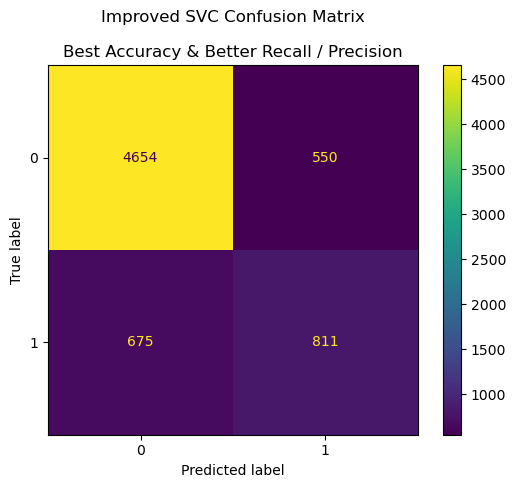

In [91]:
plot_confusion_matrix(svc, X_test, y_test, "Improved SVC Confusion Matrix\n\nBest Accuracy & Better Recall / Precision")

In [92]:
result_df = pd.concat([result_df, 
                       print_all_scores('Improved SVC', end_time, y_test, svc.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of Improved SVC:  0.8168908819133034
Recall of Improved SVC:  0.5457604306864065
Precision of Improved SVC:  0.5958853783982366


## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel="poly", class_weight='balanced', random_state=42)

param_dict = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'class_weight':['balanced', {1: 2.5}, {0: 0.28, 1: 1.0}], 'degree':[1,2]}
    
mygrid = GridSearchCV(estimator = svc, param_grid=param_dict, scoring = 'f1')
start = time.time()
mygrid.fit(X_train,y_train)
end_time = time.time() - start

accuracy_train = mygrid.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

The accuracy of the model for Train is 0.57


In [94]:
best_selector = mygrid.best_estimator_
best_selector

SVC(class_weight={1: 2.5}, degree=1, random_state=42)

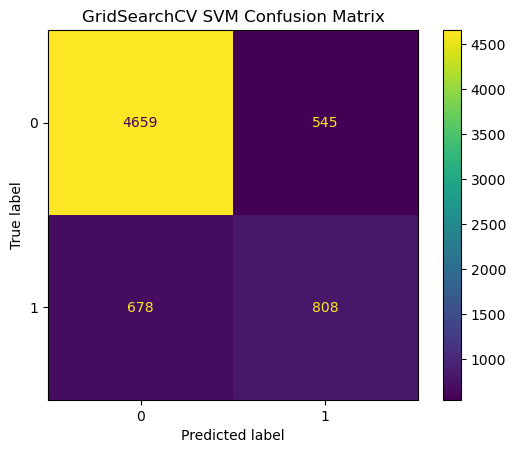

In [95]:
plot_confusion_matrix(best_selector, X_test, y_test, 'GridSearchCV SVM Confusion Matrix')

In [96]:
result_df = pd.concat([result_df, 
                       print_all_scores('GridSearchCV', end_time, y_test, best_selector.predict(X_test), accuracy_train)
                      ], ignore_index=False)

Accuracy of GridSearchCV:  0.8171898355754857
Recall of GridSearchCV:  0.5437415881561238
Precision of GridSearchCV:  0.5971914264597191


## ROC Curve and Probability :
While this method results in best False Positive rate, it sacrifices the accuracy and we have to go through half of the population. This can be costly from the business stand point, but a more detailed cost analysis is needed to find the best balance.

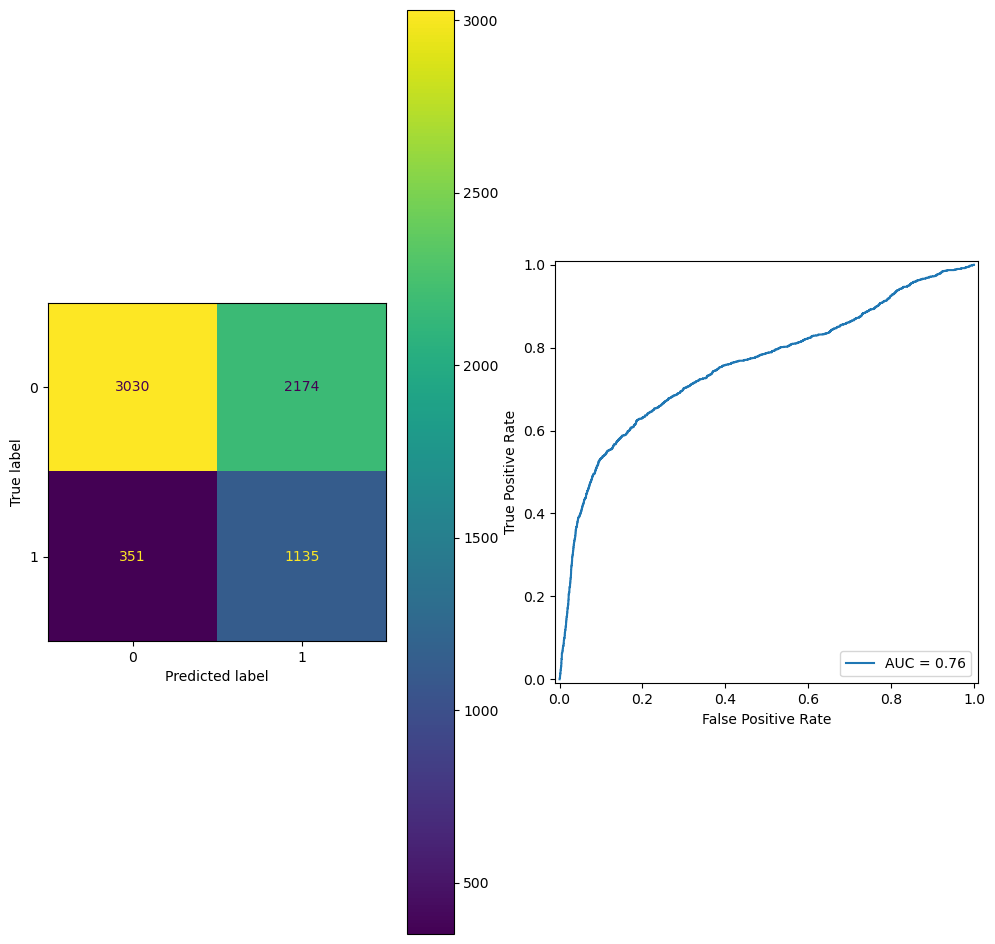

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

preds = lr.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])


y_score = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)



In [98]:
no_probs = lr.predict_proba(X_test)[:, 0]
high_prob_no = no_probs[no_probs > 0.58]
percent_of_test_data = len(high_prob_no)/len(y_test)
percent_of_no = len(high_prob_no)/sum(y_test == 0)

print(percent_of_test_data)
print(percent_of_no)

0.32944693572496264
0.4235203689469639


In [99]:
from sklearn.metrics import accuracy_score

prob_threshold = 0.58
start = time.time()
pred_proba_df = pd.DataFrame(lr.predict_proba(X_test))
y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)

pred_proba_df_tr = pd.DataFrame(lr.predict_proba(X_train))
y_train_pred = pred_proba_df_tr.applymap(lambda x: 1 if x>prob_threshold else 0)

accuracy_train = accuracy_score(y_train.values.reshape(y_train.values.size,1),
                                       y_train_pred.iloc[:,1].values.reshape(y_train_pred.iloc[:,1].values.size,1))

test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))

end_time = time.time() - start

print('Our testing accuracy is {}'.format(test_accuracy))

print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


Our testing accuracy is 0.7979073243647234
[[4486  718]
 [ 634  852]]


C:\Users\Slytherin\AppData\Local\Temp\ipykernel_36368\3335664607.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)
C:\Users\Slytherin\AppData\Local\Temp\ipykernel_36368\3335664607.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_train_pred = pred_proba_df_tr.applymap(lambda x: 1 if x>prob_threshold else 0)


In [100]:
result_df = pd.concat([result_df, 
                       print_all_scores('ROC', end_time, y_test.values.reshape(y_test.values.size,1), y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1), accuracy_train)
                      ], ignore_index=False)

Accuracy of ROC:  0.7979073243647234
Recall of ROC:  0.5733512786002691
Precision of ROC:  0.5426751592356688


##### Questions

The question here remains for the Subject-Matter-Experts (SME) and business analysts: how many of the potential customers are we willing to sacrifice to release more marketing resources?

With our final SVM models, we have a ***False Positive*** rate of %17.7 and ***False Negative*** rate of only 0.5%. So we are using almost 20% more resources for marketing campaigns than ideal numbers. Although this can be costly from a business standpoint, a detailed cost-basis analysis is needed to see if it is worth sacrificing more resources or change the model parameters to allow lower ***Recall*** score.

# Ensemble Techniques:

## Imbalanced Easy Ensemble:

In [101]:
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(random_state=42)
start = time.time()
eec.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = eec.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

The accuracy of the model for Train is 0.80
[[4488  716]
 [ 624  862]]


In [102]:
result_df = pd.concat([result_df, 
                       print_all_scores('Easy Ensemble Classifier', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Easy Ensemble Classifier:  0.7997010463378177
Recall of Easy Ensemble Classifier:  0.5800807537012113
Precision of Easy Ensemble Classifier:  0.5462610899873257


## Balanced Bagging:

In [103]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest Classifier (you can use any classifier)
base_classifier = RandomForestClassifier(random_state=42)
# Create a BalancedBaggingClassifier
balanced_bagging_classifier = BalancedBaggingClassifier(base_classifier,
														sampling_strategy='auto', # You can adjust this parameter
														replacement=False, # Whether to sample with or without replacement
														random_state=42)

# Fit the model
start = time.time()
balanced_bagging_classifier.fit(X_train, y_train)
end_time = time.time() - start

accuracy_train = balanced_bagging_classifier.score(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(accuracy_train))

# Make predictions
y_pred = balanced_bagging_classifier.predict(X_test)


The accuracy of the model for Train is 0.91


In [104]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7772795216741405
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      5204
           1       0.50      0.62      0.55      1486

    accuracy                           0.78      6690
   macro avg       0.69      0.72      0.70      6690
weighted avg       0.80      0.78      0.79      6690



In [105]:
print(confusion_matrix(y_test, y_pred))

[[4284  920]
 [ 570  916]]


In [106]:
result_df = pd.concat([result_df, 
                       print_all_scores('Balanced Bagging Classifier', end_time, y_test, y_pred, accuracy_train)
                      ], ignore_index=False)

Accuracy of Balanced Bagging Classifier:  0.7772795216741405
Recall of Balanced Bagging Classifier:  0.6164199192462988
Precision of Balanced Bagging Classifier:  0.4989106753812636


# All Results

In [107]:
result_df

,Train Time (ms),Train Accuracy,Test Accuracy,Test Recall,Test Precision
Basic Logistic Regression,39.15,0.815875,0.825859,0.358681,0.715436
Basic KNN,5.00,0.845153,0.804933,0.402423,0.589163
Basic Decision Tree,268.66,0.999936,0.733333,0.447510,0.408477
Basic Random Forest,3258.18,0.999808,0.827055,0.458950,0.658937
Basic SVC,3606.24,0.999808,0.831689,0.442799,0.688285
Improved Logistic Regression,24.94,0.621308,0.622571,0.763795,0.343004
Improved SVC,4436.03,0.812608,0.816891,0.545760,0.595885
GridSearchCV,411760.43,0.565542,0.817190,0.543742,0.597191
ROC,17.23,0.794478,0.797907,0.573351,0.542675
Easy Ensemble Classifier,1545.41,0.797809,0.799701,0.580081,0.546261
